In [5]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/c9/bc/b7db44f5f39f9d0494071bddae6880eb645970366d0a200022a1a93d57f5/pip-25.0.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 301.6 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 653.9 kB/s eta 0:00:00 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 936.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


# Graph Isomorphism Test Cases with Mermaid Diagrams

## Caso 1: 

**Graph G**:

```mermaid
graph TD
    G0 --> G1
    G1 --> G2
    G1 --> G3
    G2 --> G3
    G2 --> G4
```

**Graph P**:

```mermaid
graph TD
    P0 --> P3
    P1 --> P3
    P3 --> P4
```


# Graph Isomorphism Test Cases with Mermaid Diagrams

## Caso 1: 

**Graph G**:

```mermaid
graph TD
    G0 --> G2
    G0 --> G3
    G1 --> G3
```

**Graph P**:

```mermaid
graph TD
    P0 --> P1
    P1 --> P2
    P2 --> P3
```


# Graph Isomorphism Test Cases with Mermaid Diagrams

## Caso 1: 

**Graph G**:

```mermaid
graph TD
    G0 --> G1
    G0 --> G2
    G0 --> G3
    G1 --> G3
    G2 --> G3
```

**Graph P**:

```mermaid
graph TD
    P0 --> P2
    P0 --> P5
    P1 --> P3
    P1 --> P4
    P1 --> P5
    P2 --> P5
    P3 --> P4
```


# Graph Isomorphism Test Cases with Mermaid Diagrams

## Caso 1: 

**Graph G**:

```mermaid
graph TD
    G0 --> G1
    G0 --> G2
    G0 --> G3
    G1 --> G3
    G2 --> G3
```

**Graph P**:

```merma

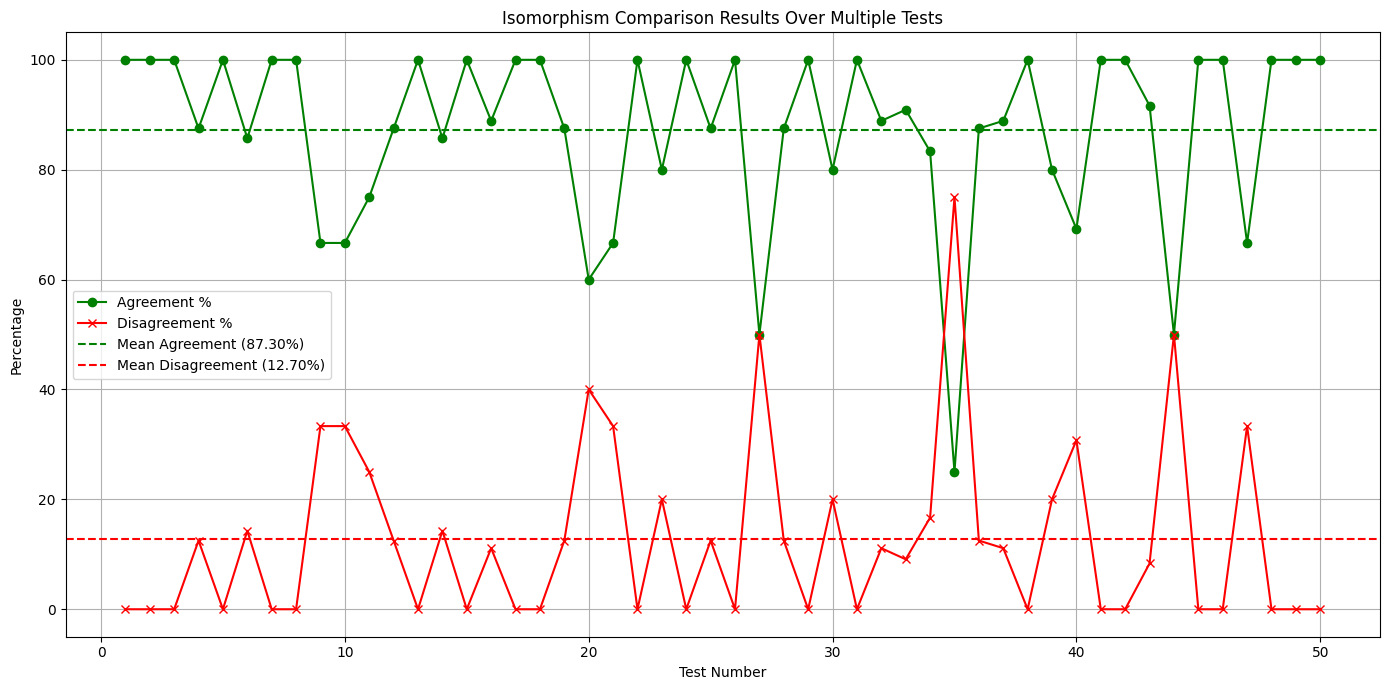

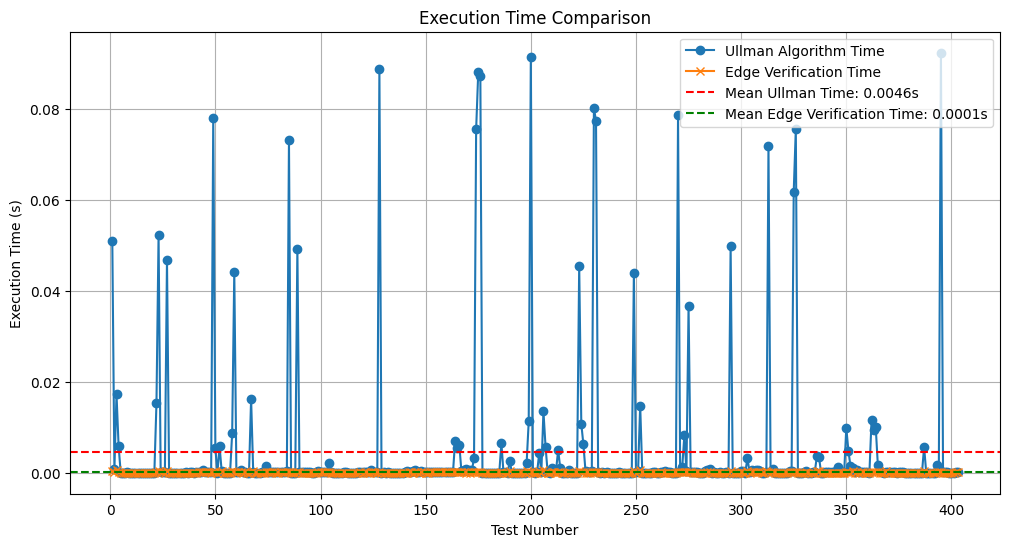

In [10]:
import networkx as nx
import random
import numpy as np
from aristas import comparar_subgrafos
from ullman_algorithm import ullman_algorithm
import matplotlib.pyplot as plt
import time
from ullman_tester_graphs import generate_mermaid_diagrams

def generate_random_graph(n, m):
    """Generate a random graph with n nodes and m edges."""
    if m > n * (n - 1) // 2:
        raise ValueError("The number of edges m is too large for the number of nodes n.")
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    edges = set()
    while len(edges) < m:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u != v:
            edges.add(tuple(sorted([u, v])))
    
    G.add_edges_from(edges)
    return G

def save_graph_details(results_file, test_number, graph1_adj, graph2_adj, result):
    results_file.write(f"\nTest {test_number}:\n")
    results_file.write(f"Graph 1 adjacency matrix:\n{graph1_adj}\n")
    results_file.write(f"Graph 2 adjacency matrix:\n{graph2_adj}\n")
    results_file.write(f"Result: {'Agreement' if result else 'Disagreement'}\n")

ullman_times = []
edge_verification_times = []

def compare_isomorphisms(G1, G2):
    """Compare isomorphism results from Ullman and edge verification methods."""
    if len(G1.nodes) == 0 or len(G2.nodes) == 0:
        return None
    if len(G1.nodes) > len(G2.nodes):
        return None

    G1_adj = nx.to_numpy_array(G1)
    G2_adj = nx.to_numpy_array(G2)

    # Time Ullman algorithm
    start_time_ullman = time.time()
    ullman_result = ullman_algorithm(G1_adj, G2_adj)
    ullman_time = time.time() - start_time_ullman
    ullman_times.append(ullman_time)

    # Time edge verification method
    start_time_edge = time.time()
    edge_verification_result = comparar_subgrafos(G1_adj, G2_adj)
    edge_verification_time = time.time() - start_time_edge
    edge_verification_times.append(edge_verification_time)
    
    test_cases = [
        {"id": 1, "G": G1_adj, "P": G2_adj}
    ]
    if ullman_result == edge_verification_result:
        markdown_content = generate_mermaid_diagrams(test_cases)
        print(markdown_content) 

    return ullman_result == edge_verification_result

def plot_execution_times():
    """Plot the execution times for both algorithms."""
    import matplotlib.pyplot as plt

    tests = list(range(1, len(ullman_times) + 1))
    mean_ullman = np.mean(ullman_times)
    mean_edge_verification = np.mean(edge_verification_times)

    plt.figure(figsize=(12, 6))
    plt.plot(tests, ullman_times, label='Ullman Algorithm Time', marker='o')
    plt.plot(tests, edge_verification_times, label='Edge Verification Time', marker='x')
    plt.axhline(mean_ullman, color='r', linestyle='--', label=f'Mean Ullman Time: {mean_ullman:.4f}s')
    plt.axhline(mean_edge_verification, color='g', linestyle='--', label=f'Mean Edge Verification Time: {mean_edge_verification:.4f}s')

    plt.xlabel('Test Number')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

agreement_percentages = []
disagreement_percentages = []

def run_tests(num_tests, num_graphs, max_nodes, max_edges, results_filename):
    """Run multiple tests and save results."""
    agreements_list = []
    disagreements_list = []
    
    with open(results_filename, 'w') as results_file:
        for test in range(num_tests):
            graphs = []
            for _ in range(num_graphs):
                # Generate a random number of nodes between 1 and max_nodes
                n = random.randint(1, max_nodes)
                # For a single node, there are no edges possible
                if n == 1:
                    m = 0
                else:
                    max_possible_edges = n * (n - 1) // 2
                    m = random.randint(1, min(max_edges, max_possible_edges))
                graphs.append(generate_random_graph(n, m))
            
            total_comparisons = 0
            agreements = 0
            disagreements = 0
            
            subtest = 0
            for i in range(num_graphs):
                for j in range(i + 1, num_graphs):
                    result = compare_isomorphisms(graphs[i], graphs[j])
                    if result is not None:
                        subtest += 1
                        total_comparisons += 1
                        if result:
                            agreements += 1
                        else:
                            disagreements += 1
                        save_graph_details(results_file, f"{test+1}.{subtest}", nx.to_numpy_array(graphs[i]), nx.to_numpy_array(graphs[j]), result)
            
            agreement_percentage = (agreements / total_comparisons) * 100 if total_comparisons > 0 else 0
            disagreement_percentage = (disagreements / total_comparisons) * 100 if total_comparisons > 0 else 0
            
            agreements_list.append(agreement_percentage)
            disagreements_list.append(disagreement_percentage)

    global agreement_percentages, disagreement_percentages
    agreement_percentages = agreements_list
    disagreement_percentages = disagreements_list
    
    mean_agreement = np.mean(agreements_list)
    mean_disagreement = np.mean(disagreements_list)
    
    print(f"\nMean Agreement: {mean_agreement:.2f}%")
    print(f"Mean Disagreement: {mean_disagreement:.2f}%")

    
run_tests(num_tests=50, num_graphs=6, max_nodes=6, max_edges=90, results_filename="isomorphism_results.txt")

def plot_isomorphism_results(agreements, disagreements):
    tests = range(1, len(agreements) + 1)
    mean_agreement = np.mean(agreements)
    mean_disagreement = np.mean(disagreements)

    plt.figure(figsize=(14, 7))
    plt.plot(tests, agreements, marker='o', label='Agreement %', color='green')
    plt.plot(tests, disagreements, marker='x', label='Disagreement %', color='red')
    
    # Plotting mean lines
    plt.axhline(y=mean_agreement, color='green', linestyle='--', label=f'Mean Agreement ({mean_agreement:.2f}%)')
    plt.axhline(y=mean_disagreement, color='red', linestyle='--', label=f'Mean Disagreement ({mean_disagreement:.2f}%)')
    
    
    plt.title('Isomorphism Comparison Results Over Multiple Tests')
    plt.xlabel('Test Number')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_isomorphism_results(agreement_percentages, disagreement_percentages)
plot_execution_times()
